In [19]:
import pandas as pd
import statsmodels
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.chdir('../../../..')
from modules.join_data import join_y
from modules import preproc




In [11]:
print(os.getcwd())
os.ch

c:\Users\Rory\Desktop\projects\expenditure_prox


AttributeError: module 'os' has no attribute 'ch'

In [12]:
# importing datasets
laptops = pd.read_json('full_data/laptops.json')
desktops = pd.read_json('full_data/desktops.json')
tablets= pd.read_json('full_data/tablets.json')
phones =  pd.read_json('full_data/smartphones.json')

In [14]:
# joining datasets
laptops = join_y(laptops, 'raw_data/laptops_sales.csv')
desktops = join_y(desktops, 'raw_data/desktops_sales.csv')
tablets = join_y(tablets, 'raw_data/tablet_sales.csv')
phones = join_y(phones, 'raw_data/phone_sales.csv')

In [17]:
def none_to_empty_list(text):
    """Turns nulls to empty list
    """
    if text == None:
        text = ['']
    else:
        text = text
    return text

In [20]:
## preprocessing
# clean cols
laptops = preproc.clean_cols(laptops)
desktops = preproc.clean_cols(desktops)
tablets = tablets.applymap(lambda x: none_to_empty_list(x))
tablets = preproc.clean_cols(tablets)
phones = preproc.clean_cols(phones)
# fill empty lists
laptops = preproc.fill_empty_lists(laptops)
desktops = preproc.fill_empty_lists(desktops)
tablets= preproc.fill_empty_lists(tablets)
phones = preproc.fill_empty_lists(phones)

# preproc reviews
laptops = preproc.preprocess_reviews(laptops)
desktops = preproc.preprocess_reviews(desktops)
tablets = preproc.preprocess_reviews(tablets)
phones = preproc.preprocess_reviews(phones)
                                

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rory\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rory\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


c:\Users\Rory\Desktop\projects\expenditure_prox\modules\preproc.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_preproc'] = df['review_text'].apply(lambda x: __remove_accented_chars(x))
c:\Users\Rory\Desktop\projects\expenditure_prox\modules\preproc.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_preproc'] = df['text_preproc'].apply(lambda x: __lower_text(x))
c:\Users\Rory\Desktop\projects\expenditure_prox\modules\preproc.py:161: SettingWithCopyWarning: 
A value is trying to be

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rory\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rory\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rory\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rory\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rory\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rory\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(0, 200)

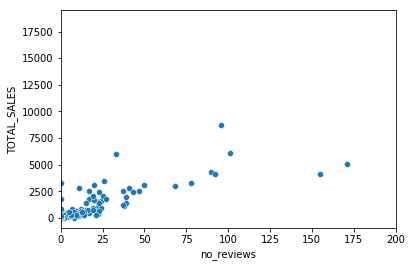

In [21]:
# laptops
sns.scatterplot(x=laptops['no_reviews'], y=laptops['TOTAL_SALES'])
plt.xlim([0,200])

In [22]:
import scipy
print(scipy.stats.pearsonr(laptops['no_reviews'],laptops['TOTAL_SALES']))
print(scipy.stats.pearsonr(laptops['price'],laptops['TOTAL_SALES']))

(0.9055779949234491, 8.973899969096474e-43)
(-0.2720782258761909, 0.0037071809365100666)


In [23]:
laptops[['price','no_reviews','recommendation_percent','summary_star_rating','TOTAL_SALES']].corr()

,price,no_reviews,recommendation_percent,summary_star_rating,TOTAL_SALES
price,1.000000,-0.150710,-0.213528,-0.202797,-0.272078
no_reviews,-0.150710,1.000000,0.192304,0.197432,0.905578
recommendation_percent,-0.213528,0.192304,1.000000,0.994372,0.194676
summary_star_rating,-0.202797,0.197432,0.994372,1.000000,0.199947
TOTAL_SALES,-0.272078,0.905578,0.194676,0.199947,1.000000


In [24]:
laptops.columns

Index(['product_name', 'price', 'urls', 'remotekey', 'shelf_order',
       'item_category', 'no_reviews', 'recommendation_percent', 'review_date',
       'review_rating', 'review_text', 'review_title', 'summary_star_rating',
       'code', 'TOTAL_SALES', 'text_preproc', 'text_preproc2'],
      dtype='object')

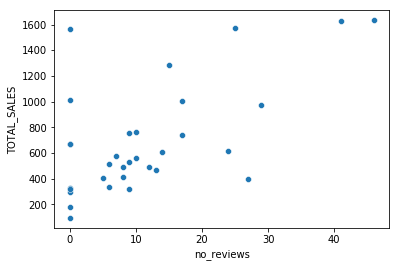

In [25]:
# desktops

sns.scatterplot(x=desktops['no_reviews'], y=desktops['TOTAL_SALES'])
#plt.xlim([0,200])

In [26]:
print(scipy.stats.pearsonr(desktops['no_reviews'],desktops['TOTAL_SALES']))
print(scipy.stats.pearsonr(desktops['price'],desktops['TOTAL_SALES']))

(0.6019596990602754, 0.00026760099161089095)
(-0.5661258559487619, 0.0007318686926298205)


In [27]:
desktops[['price','no_reviews','recommendation_percent','summary_star_rating','TOTAL_SALES']].corr()

,price,no_reviews,recommendation_percent,summary_star_rating,TOTAL_SALES
price,1.000000,-0.397231,-0.125063,-0.150560,-0.566126
no_reviews,-0.397231,1.000000,0.603911,0.615387,0.601960
recommendation_percent,-0.125063,0.603911,1.000000,0.994477,0.199026
summary_star_rating,-0.150560,0.615387,0.994477,1.000000,0.201446
TOTAL_SALES,-0.566126,0.601960,0.199026,0.201446,1.000000


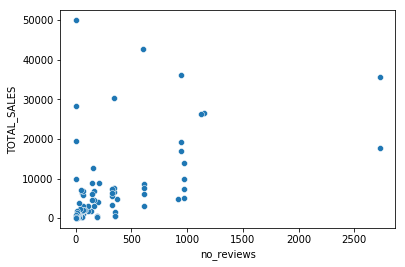

In [28]:
# tablets
sns.scatterplot(x=tablets['no_reviews'], y=tablets['TOTAL_SALES'])
#plt.xlim([0,200])

In [29]:
print(scipy.stats.pearsonr(tablets['no_reviews'],tablets['TOTAL_SALES']))
print(scipy.stats.pearsonr(tablets['price'],tablets['TOTAL_SALES']))

(0.49989599457465167, 9.565028266280317e-07)
(-0.34383753588383004, 0.0011894829538713948)


In [30]:
tablets[['price','no_reviews','recommendation_percent','summary_star_rating','TOTAL_SALES']].corr()

,price,no_reviews,recommendation_percent,summary_star_rating,TOTAL_SALES
price,1.000000,-0.257500,0.118914,0.152881,-0.343838
no_reviews,-0.257500,1.000000,0.281621,0.254986,0.499896
recommendation_percent,0.118914,0.281621,1.000000,0.988050,-0.144294
summary_star_rating,0.152881,0.254986,0.988050,1.000000,-0.186605
TOTAL_SALES,-0.343838,0.499896,-0.144294,-0.186605,1.000000


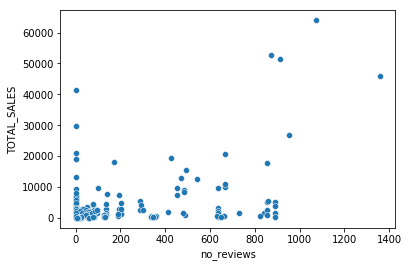

In [31]:
# phones
sns.scatterplot(x=phones['no_reviews'], y=phones['TOTAL_SALES'])
#plt.xlim([0,200])

In [32]:
print(scipy.stats.pearsonr(phones['no_reviews'],phones['TOTAL_SALES']))
print(scipy.stats.pearsonr(phones['price'],phones['TOTAL_SALES']))

(0.45105711135275045, 3.487898081580861e-14)
(-0.3543414213993321, 5.866274885763125e-09)


In [33]:
phones[['price','no_reviews','recommendation_percent','summary_star_rating','TOTAL_SALES']].corr()

,price,no_reviews,recommendation_percent,summary_star_rating,TOTAL_SALES
price,1.000000,0.030408,0.333129,0.349611,-0.354341
no_reviews,0.030408,1.000000,0.341049,0.356328,0.451057
recommendation_percent,0.333129,0.341049,1.000000,0.997047,-0.061885
summary_star_rating,0.349611,0.356328,0.997047,1.000000,-0.063449
TOTAL_SALES,-0.354341,0.451057,-0.061885,-0.063449,1.000000


In [34]:
phones.loc[phones['TOTAL_SALES']>40000]

,product_name,price,urls,remotekey,shelf_order,item_category,no_reviews,recommendation_percent,review_date,review_rating,review_text,review_title,summary_star_rating,code,TOTAL_SALES,text_preproc,text_preproc2
0,sim free motorola g8 power lite 64gb mobile ph...,99.95,https://www.argos.co.uk/product/7126877?clickP...,7126877,1,[Experience the power to be your creative best...,871,96,"[1 August 2021, 1 August 2021, 1 August 2021, ...","[5, 5, 2, 5, 5, 5, 4, 5, 3, 5, 4, 5, 5, 5, 5, ...",[I'm very pleased with the phone. It arrived q...,"[Overall a lovely phone, Brilliant, Difficult ...",4.7,2303179732635262459831782148741979332223786223...,52704,"[[i, m, very, pleased, with, the, phone, it, a...","[[pleased, phone, arrived, quickly, lot, great..."
5,sim free alcatel 1c mobile phone black,49.99,https://www.argos.co.uk/product/1952085?clickP...,1952085,6,"[Alcatel 1C, is the best deal for an 18:9 disp...",1071,87,"[31 July 2021, 31 July 2021, 31 July 2021, 30 ...","[3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 2, 3, 5, ...",[The phone does what it is support to do and i...,"[Good for a child's first phone, Simple to use...",4.3,6523362733424390017607564743466362116793130797...,63939,"[[the, phone, does, what, it, is, support, to,...","[[phone, support, good, price, thing, like, ba..."
6,sim free nokia 105 mobile phone black,17.99,https://www.argos.co.uk/product/4637620?clickP...,4637620,7,[Talk to everyone with the latest Nokia 105. W...,914,89,"[30 July 2021, 30 July 2021, 30 July 2021, 30 ...","[5, 5, 3, 4, 5, 5, 5, 5, 4, 4, 5, 5, 1, 2, 1, ...",[Needed as an emergency phone and is great for...,"[Good for the Price, Great product, Phone work...",4.4,5849412132309916829220345124034463633224670657...,51463,"[[needed, as, an, emergency, phone, and, is, g...","[[needed, emergency, phone, great, purpose, ph..."
35,sim free samsung galaxy a12 64gb mobile phone ...,149.99,https://www.argos.co.uk/product/8886635?clickP...,8886635,36,[Tap into an unforgettable viewing experience ...,0,0,0,0,0,0,0.0,4462311512265498974656112752638448649577476511...,41462,[],[]
185,sim free alba mobile phone black,12.99,https://www.argos.co.uk/product/4981558?clickP...,4981558,45,"[Simple to set up and use, light weight, robus...",1359,86,"[25 June 2021, 23 June 2021, 10 June 2021, 9 J...","[5, 2, 5, 2, 5, 1, 2, 5, 3, 4, 5, 5, 4, 5, 5, ...",[Bought this for my daughter it is such good q...,"[Perfect, Not great, Basic but easy to use., N...",4.2,4265621254144453889325147033289654510607247352...,45811,"[[bought, this, for, my, daughter, it, is, suc...","[[bought, daughter, good, quality, money], [aw..."


# Feature: Price

Text(0.5,1,'DESKTOPS')

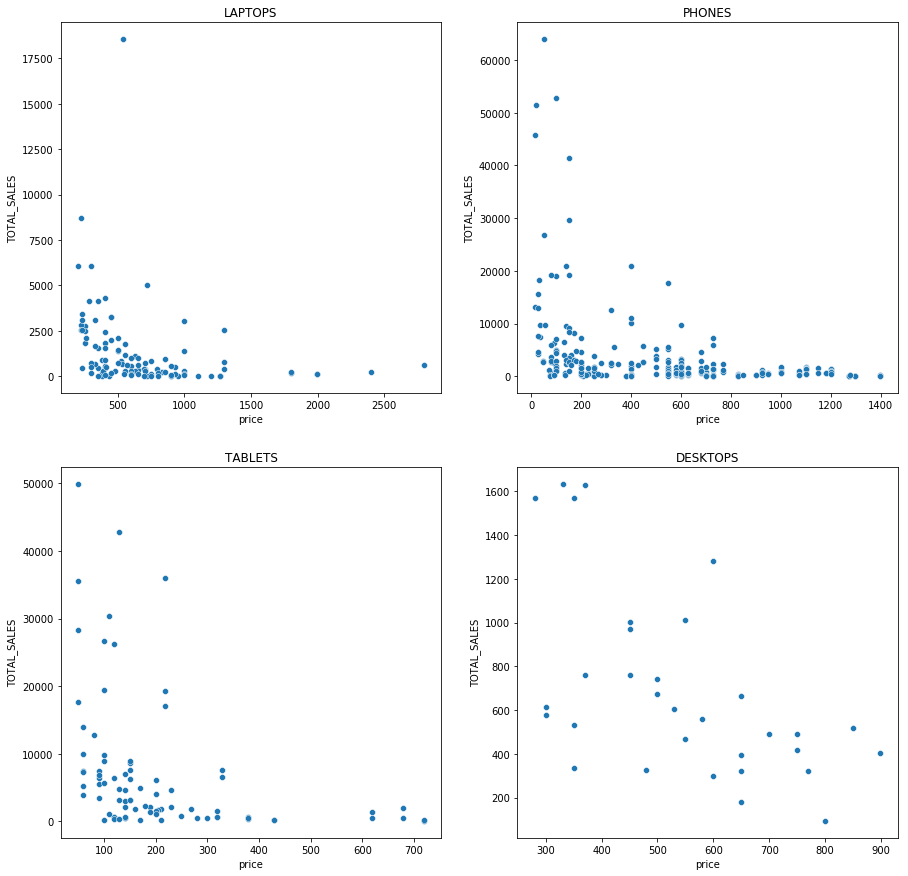

In [39]:
f, axes = plt.subplots(2,2, figsize=(15,15))
sns.scatterplot(x=laptops['price'].dropna(), y=laptops['TOTAL_SALES'], ax=axes[0,0])
axes[0,0].set_title('LAPTOPS')
sns.scatterplot(x=phones['price'].dropna(), y=phones['TOTAL_SALES'], ax=axes[0,1])
axes[0,1].set_title('PHONES')
sns.scatterplot(x=tablets['price'].dropna(), y=tablets['TOTAL_SALES'], ax=axes[1,0])
axes[1,0].set_title('TABLETS')
sns.scatterplot(x=desktops['price'].dropna(), y=desktops['TOTAL_SALES'], ax=axes[1,1])
axes[1,1].set_title('DESKTOPS')

**For all categories higher priced products tend to have very low sales. Perhaps removing outliers here could better align clusters.**